In [1]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz 2>/dev/null | tar xz
!apt-get install -qq g++ make
import os
os.chdir('/content/spatialindex-src-1.8.5')
!mount -o remount,exec /content
!./configure 2>&1 >/dev/null && make 2>&1 >/dev/null && make install && ldconfig
!pip install -q rtree

mount: /content: mount point not mounted or bad option.
./configure: line 6204: /usr/bin/file: No such file or directory
/content/spatialindex-src-1.8.5/missing: Unknown `--is-lightweight' option
Try `/content/spatialindex-src-1.8.5/missing --help' for more information
configure: WARNING: 'missing' script is too old or missing
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
src/tools/.libs/libtools.a(Tools.o): In function `Tools::TemporaryFile::TemporaryFile()':
Tools.cc:(.text+0x3d35): warning: the use of `mktemp' is dangerous, better use `mkstemp' or `mkdtemp'
ar: `u' modifier ignored since `D' is the default (see `U')

In [2]:
!pip install --upgrade geopandas
!pip install --upgrade rtree
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 247kB/s 
     |████████████████████████████████| 10.9MB 41.1MB/s 
Requirement already up-to-date: rtree in /usr/local/lib/python3.6/dist-packages (0.9.4)
     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=a9fd1f002054b5a93f244872f8d7300cd572679165b54df63eb0575c58c5107c
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.0)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [3]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

In [4]:
PATH = '/content/drive/My Drive/otimização/'
CADASTRO = 'talhoes.shp'

EPSG = 4326

cadastro = geopandas.read_file(PATH + CADASTRO)
cadastro.crs = 'EPSG:' + str(EPSG)

In [6]:
# cadastro[cadastro['Idade'] == 2]
cadastro.sample(10)

,id,Fazenda,Area,Idade,MatGen,Sitio,Talhao,geometry
102,102,FZ4,89.371,2.0,MG100,1,FZ4_10,"POLYGON ((-44.20200 -16.79619, -44.20206 -16.7..."
119,119,FZ6,32.405,5.0,MG007,2,FZ6_11,"POLYGON ((-44.25432 -16.83482, -44.25011 -16.8..."
139,139,FZ6,25.846,4.0,MG007,3,FZ6_13,"POLYGON ((-44.20969 -16.89827, -44.21318 -16.8..."
82,82,FZ4,56.972,6.0,MG032,2,FZ4_82,"POLYGON ((-44.20702 -16.82934, -44.20264 -16.8..."
138,138,FZ6,12.706,4.0,MG007,3,FZ6_13,"POLYGON ((-44.21144 -16.89309, -44.21609 -16.8..."
7,8,FZ1,45.934,3.0,MG001,2,FZ1_8,"POLYGON ((-44.17641 -16.87414, -44.17973 -16.8..."
24,24,FZ2,27.218,4.0,MG001,2,FZ2_24,"POLYGON ((-44.16019 -16.87121, -44.16192 -16.8..."
137,137,FZ6,28.954,4.0,MG007,3,FZ6_13,"POLYGON ((-44.22209 -16.88885, -44.22039 -16.8..."
78,78,FZ4,42.987,6.0,MG032,1,FZ4_78,"POLYGON ((-44.18895 -16.82292, -44.18454 -16.8..."
44,44,FZ3,45.380,5.0,MG007,2,FZ3_44,"POLYGON ((-44.16214 -16.85307, -44.15769 -16.8..."


## Mapas temáticos da empresa

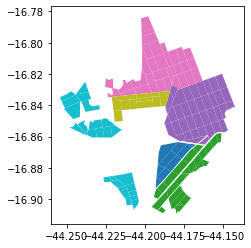

In [ ]:
cadastro.plot(column='Fazenda',
             categorical=True)

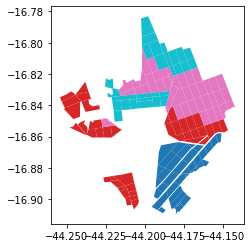

In [ ]:
cadastro.plot(column='MatGen',
             categorical=True)

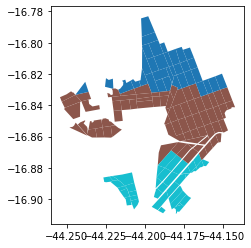

In [ ]:
cadastro.plot(column='Sitio',
             categorical=True)

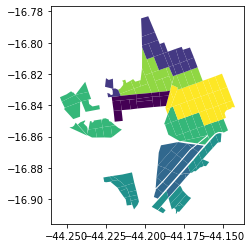

In [ ]:
cadastro.plot(column='Idade',
             categorical=False)

## Explorando o cadastro florestal

O que o cadastro nos diz:

1. Qual a tamanho médio de talhão?
2. Quantos materiais genéticos diferentes eu tenho?
3. Quantos sítios diferentes eu tenho?
4. Qual a consequência de ter S sítios e M materiais genéticos diferentes?
5. Quantos talhões em cada classe de idade?

In [ ]:
# Qual a tamanho médio de talhão?

# média global
print('Média geral:', cadastro['Area'].mean())

# média por fazenda
cadastro.pivot_table(index = 'Fazenda', values='Area', aggfunc='mean')

Mèdia geral: 39.177809859154934


,Area
Fazenda,
FZ1,42.931667
FZ2,28.074962
FZ3,43.345421
FZ4,46.796406
FZ5,35.559833
FZ6,35.023440


In [ ]:
# Quantos materiais genéticos diferentes eu tenho?

print(cadastro['MatGen'].unique())

print('Número de materiais genéticos:', len(cadastro['MatGen'].unique()))

['MG001' 'MG007' 'MG032' 'MG100']
Número de materiais genéticos: 4


In [ ]:
# Quantos sítios diferentes eu tenho?

print('Número de sítios', len(cadastro['Sitio'].unique()))

Número de sítios 3


In [ ]:
# Qual a consequência de ter S sítios e M materiais genéticos diferentes?

cadastro.pivot_table(index = 'MatGen', columns='Sitio', values='Area', aggfunc='count')

Sitio,1,2,3
MatGen,,,
MG001,NaN,10.0,25.0
MG007,1.0,27.0,11.0
MG032,18.0,22.0,NaN
MG100,15.0,13.0,NaN


Se a empresa tem 4 materiais genéticos e 3 qualidades de sítio, isto significa que ela poderá ter até 12 comportamentos diferentes de crescimento, assumindo que o ciclo de corte comporta apenas uma rotação.

E se assumirmos duas rotações? Quantos comportamentos diferentes de crescimento podem haver dentro da empresa?

- A resposta seria 24. Cada combinação de sítio x material genético poderia estar na primeira ou segunda rotação.

In [ ]:
# Quantos talhões em cada classe de idade?

cadastro.pivot_table(index = ['Idade'], values='Area', aggfunc='count')

,Area
Idade,
1.0,12
2.0,16
3.0,19
4.0,27
5.0,29
6.0,16
7.0,23


In [ ]:
cadastro.pivot_table(index = ['Idade'], columns=['MatGen', 'Sitio'],values='Area', aggfunc='count')

MatGen MG001       MG007             MG032       MG100      
Sitio      2     3     1     2     3     1     2     1     2
Idade                                                       
1.0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  12.0
2.0      NaN   NaN   NaN   NaN   NaN   NaN   NaN  15.0   1.0
3.0      6.0  13.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
4.0      4.0  12.0   NaN   NaN  11.0   NaN   NaN   NaN   NaN
5.0      NaN   NaN   1.0  27.0   NaN   NaN   1.0   NaN   NaN
6.0      NaN   NaN   NaN   NaN   NaN  14.0   2.0   NaN   NaN
7.0      NaN   NaN   NaN   NaN   NaN   4.0  19.0   NaN   NaN

# Determinando a produção da empresa

MG001: exp(6.2747-3.7634 * (1/i) - 0.2581 * S)

MG007: exp(6.2457-3.1874 * (1/i) - 0.1456 * S)

MG032: exp(5.5457-2.1911 * (1/i) - 0.1124 * S)

MG100: exp(6.1457-2.1874 * (1/i) - 0.1678 * S)

In [ ]:
# Produção do material genético 001

idade = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
vol = []
S = 1.0
vol_s1 = [np.exp(6.2747-3.7634 * (1/i) - 0.2581 * S) for i in idade]
print(vol_s1)

S = 2.0
vol_s2 = [np.exp(6.2747-3.7634 * (1/i) - 0.2581 * S) for i in idade]
print(vol_s2)

S = 3.0
vol_s3 = [np.exp(6.2747-3.7634 * (1/i) - 0.2581 * S) for i in idade]
print(vol_s3)


[9.518145220099527, 62.483342423796074, 116.9952497250973, 160.09221612680022, 193.23749955121522, 219.06460069628096, 239.60013473433827, 256.2555016305754, 270.0060711386947, 281.5359082963483]
[7.352938284955828, 48.269505250848724, 90.38093357149269, 123.67411484712184, 149.27944212689866, 169.23134204096573, 185.09541124129532, 197.96198157295152, 208.58454370435152, 217.49155017414063]
[5.68027700483055, 37.28906052046248, 69.82089591200088, 95.54047694051854, 115.32105255694384, 130.73425390482322, 142.9895325416701, 152.92918941808855, 161.13530962051573, 168.0161322347535]


In [ ]:
# Produção do material genético 007

idade = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
vol = []
S = 1.0
vol_s1 = [np.exp(6.2457-3.1874 * (1/i) - 0.1456 * S) for i in idade]
print(vol_s1)

S = 2.0
vol_s2 = [np.exp(6.2457-3.1874 * (1/i) - 0.1456 * S) for i in idade]
print(vol_s2)

S = 3.0
vol_s3 = [np.exp(6.2457-3.1874 * (1/i) - 0.1456 * S) for i in idade]
print(vol_s3)


[18.406428893939804, 90.5950884309034, 154.10486825111542, 200.9889637831172, 235.71418722361113, 262.13684240516403, 282.80486670033537, 299.3684233527882, 312.9190229487429, 324.19980246448944]
[15.912421012399461, 78.31976517958503, 133.22418801614822, 173.75564966954897, 203.77572462915776, 226.61820080620464, 244.48577881247118, 258.8050304410876, 270.5195703436253, 280.27184298906553]
[13.756342630873826, 67.70770605807965, 115.17276821936834, 150.21235606083084, 176.16481399461085, 195.91221312288758, 211.35879569172099, 223.73783791712793, 233.86509790709295, 242.29597111210907]


In [ ]:
# Produção do material genético 032

idade = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
vol = []
S = 1.0
vol_s1 = [np.exp(5.5457-2.1911 * (1/i) - 0.1124 * S) for i in idade]
print(vol_s1)

S = 2.0
vol_s2 = [np.exp(5.5457-2.1911 * (1/i) - 0.1124 * S) for i in idade]
print(vol_s2)

S = 3.0
vol_s3 = [np.exp(5.5457-2.1911 * (1/i) - 0.1124 * S) for i in idade]
print(vol_s3)


[25.589957772141105, 76.53514139520077, 110.27015763799669, 132.35993606306596, 147.68475969166943, 158.8748311409158, 167.3831865573757, 174.0621640385327, 179.44063777261172, 183.86283175343573]
[22.869405203981415, 68.39843881322707, 98.54697453528674, 118.28831596958358, 131.98390719965687, 141.98432535247304, 149.58812952327727, 155.55704294333515, 160.36371344661876, 164.31576944212227]
[20.4380835263931, 61.12677584182433, 88.07012158212495, 105.71269608541643, 117.95226397128535, 126.88950478201409, 133.68492352487576, 139.01926212934953, 143.3149196837864, 146.84681960932627]


In [ ]:
# Produção do material genético 100

idade = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
vol = []
S = 1.0
vol_s1 = [np.exp(6.1457-2.1874 * (1/i) - 0.1678 * S) for i in idade]
print(vol_s1)

S = 2.0
vol_s2 = [np.exp(6.1457-2.1874 * (1/i) - 0.1678 * S) for i in idade]
print(vol_s2)

S = 3.0
vol_s3 = [np.exp(6.1457-2.1874 * (1/i) - 0.1678 * S) for i in idade]
print(vol_s3)


[44.278534009093505, 132.18467528368967, 190.33138160419864, 228.38892794300082, 254.78498668407192, 274.0562379535764, 288.7075637634873, 300.2078295584519, 309.468266558812, 317.0818682507075]
[37.43851547317652, 111.7651729370464, 160.92954599076015, 193.1080737889876, 215.42654651451898, 231.7208312054404, 244.1088630206818, 253.83260136355472, 261.66251311842797, 268.09998787064296]
[31.655123011692783, 94.50001563977987, 136.0696200201433, 163.27730288133665, 182.1480831628354, 195.92527437246585, 206.39963923517493, 214.6212828951029, 221.2416527639027, 226.68468522901293]


In [ ]:
# Atualizando o cadastro


cadastro['vol'] = np.nan

for i in cadastro.index:
    if cadastro.at[i, 'MatGen'] == 'MG001':
      cadastro.at[i, 'vol'] = np.exp(6.2747-3.7634 * (1/cadastro.at[i, 'Idade']) - 0.2581 * cadastro.at[i, 'Sitio'])
    elif cadastro.at[i, 'MatGen'] == 'MG007':
      cadastro.at[i, 'vol'] = np.exp(6.2457-3.1874 * (1/cadastro.at[i, 'Idade']) - 0.1456 * cadastro.at[i, 'Sitio'])
    elif cadastro.at[i, 'MatGen'] == 'MG032':
      cadastro.at[i, 'vol'] = np.exp(5.5457-2.1911 * (1/cadastro.at[i, 'Idade']) - 0.1124 * cadastro.at[i, 'Sitio'])
    elif cadastro.at[i, 'MatGen'] == 'MG100':
      cadastro.at[i, 'vol'] = np.exp(6.1457-2.1874 * (1/cadastro.at[i, 'Idade']) - 0.1678 * cadastro.at[i, 'Sitio'])
    else: 
      cadastro.at[i, 'vol'] = 0

cadastro.head()

,id,Fazenda,Area,Idade,MatGen,Sitio,geometry,vol,volTotal
0,1,FZ1,86.878,3.0,MG001,2,"POLYGON ((-44.19181 -16.87834, -44.19118 -16.8...",90.380934,7852.114747
1,2,FZ1,63.246,3.0,MG001,3,"POLYGON ((-44.18324 -16.86875, -44.17973 -16.8...",69.820896,4415.892383
2,3,FZ1,45.871,3.0,MG001,2,"POLYGON ((-44.17883 -16.86352, -44.17310 -16.8...",90.380934,4145.863804
3,4,FZ1,21.285,3.0,MG001,3,"POLYGON ((-44.18724 -16.87996, -44.19261 -16.8...",69.820896,1486.137769
4,5,FZ1,15.002,3.0,MG001,3,"POLYGON ((-44.19261 -16.88596, -44.18921 -16.8...",69.820896,1047.453080


In [ ]:
# Volume disponível por classe de idade

cadastro['volTotal'] = cadastro['vol'] * cadastro['Area']
cadastro.pivot_table(index = 'Idade', values = 'volTotal', aggfunc='sum')

,volTotal
Idade,
1.0,15975.688446
2.0,96975.131871
3.0,54566.499102
4.0,84213.571463
5.0,243128.301282
6.0,119124.548472
7.0,159255.206518
